In [1]:
#Lendo os dataframes
import pandas as pd
path = 'C:\\Users\\napcc\\Dropbox (CPI)\\EduardoMinsky\\Dados_Mineracao\\Dados Tabulares\\Dados_Relacionados\\'
#Pegando processos apenas do Pará
mun = pd.read_csv(path+'ProcessoMunicipio.csv')
substancia = pd.read_csv(path+'ProcessoSubstancia.csv')
evento = pd.read_csv(path+'ProcessoEvento.csv')
processos = pd.read_csv(path+'Processo.csv')
pessoa = pd.read_csv(path+'ProcessoPessoa.csv')

In [16]:
#Criando função apenas para analisar o tempo entre o evento 333 - 1402 - 513
def time_line_requerimento_licenca_liberacao (lista_processo:list,new_lista_processo:list):
    import sys
    import numpy as np
    pd.options.mode.chained_assignment = None
    for i in range(len(lista_processo)):
        sys.stdout.write("\r"+str(i))
        
        meu_processo = evento[evento['DSProcesso']==lista_processo[i]]
        meu_processo['DTEvento'] = pd.to_datetime(meu_processo.DTEvento)
        meu_processo = meu_processo.sort_values('DTEvento')
        meu_processo = meu_processo.query('IDEvento == 333 | IDEvento ==1402 | IDEvento==513')
        meu_processo.drop_duplicates(subset = 'IDEvento',keep = 'first',inplace=True)
        meu_processo['Tempo_dias'] = meu_processo.DTEvento.diff()
        meu_processo['Tempo_Ano'] = meu_processo.DTEvento.diff()/ np.timedelta64(1, 'Y')
        meu_processo['Tempo_Mes'] = meu_processo.DTEvento.diff()/ np.timedelta64(1, 'M')
        meu_processo['Tempo_dias'] = meu_processo['Tempo_dias'].fillna(pd.Timedelta(days=0))        
        new_lista_processo.append(meu_processo)
    df_final= pd.concat(new_lista_processo)
    return df_final


In [2]:
#Criando função para calcular o tempo total que leva um processo( quanto tempo demora do evento 333 direto para o 513):
def time_line_requerimento_liberacao (lista_processo:list,new_lista_processo:list):
    import sys
    import numpy as np
    pd.options.mode.chained_assignment = None
    for i in range(len(lista_processo)):
        sys.stdout.write("\r"+str(i))
        meu_processo = evento[evento['DSProcesso']==lista_processo[i]]
        meu_processo['DTEvento'] = pd.to_datetime(meu_processo.DTEvento)
        meu_processo = meu_processo.sort_values('DTEvento')
        meu_processo = meu_processo.query('IDEvento == 333  | IDEvento==513')
        meu_processo.drop_duplicates(subset = 'IDEvento',keep = 'first',inplace=True)
        meu_processo['Tempo_dias'] = meu_processo.DTEvento.diff()
        meu_processo['Tempo_Ano'] = meu_processo.DTEvento.diff()/ np.timedelta64(1, 'Y')
        meu_processo['Tempo_Mes'] = meu_processo.DTEvento.diff()/ np.timedelta64(1, 'M')
        meu_processo['Tempo_dias'] = meu_processo['Tempo_dias'].fillna(pd.Timedelta(days=0))        
        new_lista_processo.append(meu_processo)
    df_final= pd.concat(new_lista_processo)
    return df_final

In [3]:
#criando dataframe para analise
#Pegando para ouro
ouro = substancia.query('Substancia.str.contains("OURO")',engine = 'python')
#Pegando processo ativos
prceossos_ativos = processos.query('BTAtivo=="S"')
#criando df de processos ativos para ouro:
ativo_ouro = prceossos_ativos[prceossos_ativos['DSProcesso'].isin(ouro.DSProcesso)]
ativo_ouro.drop_duplicates(subset='DSProcesso' ,keep ='last',inplace=True)
lista_processo = ativo_ouro.DSProcesso.unique().tolist()
new_lista =[]
data_frame = time_line_requerimento_liberacao(lista_processo = lista_processo,new_lista_processo = new_lista)
data_frame

C:\Users\napcc\AppData\Local\Temp\ipykernel_7292\3988971936.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ativo_ouro.drop_duplicates(subset='DSProcesso' ,keep ='last',inplace=True)


39828

,Unnamed: 0,DSProcesso,IDEvento,DTEvento,Evento_,Tempo_dias,Tempo_Ano,Tempo_Mes
1526270,1526270,815.187/2022,333,2022-07-08,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,0 days,NaN,NaN
1526692,1526692,815.188/2022,333,2022-07-08,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,0 days,NaN,NaN
1527201,1527201,815.189/2022,333,2022-07-08,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,0 days,NaN,NaN
2058950,2058950,820.434/2007,333,2007-07-05,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,0 days,NaN,NaN
2172757,2172757,820.657/2006,333,2006-09-27,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,0 days,NaN,NaN
...,...,...,...,...,...,...,...,...
820907,820907,806.127/2015,513,2018-03-01,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL,898 days,2.45864,29.503686
826075,826075,806.146/2021,333,2021-11-17,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,0 days,NaN,NaN
827764,827764,806.155/2021,333,2021-12-03,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,0 days,NaN,NaN
829788,829788,806.165/2021,333,2021-12-13,REQ PLG/REQUERIMENTO LAVRA GARIMPEIRA PROTOCOL...,0 days,NaN,NaN


In [4]:
#Salvando este DF POIS ESTA MERDA DEMOROU 4 HORAS
data_frame.dropna(how='any',inplace=True)
data_frame.drop_duplicates(subset='DSProcesso' )
data_frame[data_frame['DSProcesso'].isin(data_frame.query("IDEvento==513").DSProcesso.unique())].to_csv('DFLinhaTemporal.csv')

In [6]:
#Lendo o DF:
import pandas as pd
data_frame=pd.read_csv('DFLinhaTemporal.csv')
#Transformando o DF para Trabalhar com Ele
df_2 = data_frame[data_frame['DSProcesso'].isin(data_frame.query("IDEvento==513").DSProcesso.unique())]
df_2_m = df_2.merge(mun,on='DSProcesso',how='inner')
#Pegando os eventos 333 para esses processos e dando join ao nosso df principal:
target = evento[evento['DSProcesso'].isin(data_frame['DSProcesso'])].query("IDEvento==333")[['DSProcesso','DTEvento']]
df_2_m_e = df_2.merge(target,on='DSProcesso',how='inner')
#Passando o campo de Data para ano
df_2_m_e['Ano_333'] = pd.to_datetime(df_2_m_e.DTEvento_y).dt.year
#Pegando em quais UFs e municipios esses processos ocorrem:
target_2 = mun[mun['DSProcesso'].isin(df_2_m_e['DSProcesso'])][['DSProcesso','Municipios','UF']]
df_2_m_e_u = df_2_m_e.merge(target_2,on='DSProcesso',how='inner')
#Pegando valor de área para esses Processos:
target3 = processos[processos['DSProcesso'].isin(df_2_m_e_u['DSProcesso'])][['QTAreaHA','DSProcesso']]
df_2_m_e_u_a = df_2_m_e_u.merge(target3,on='DSProcesso',how='inner')
df_2_m_e_u_a['QTAreaHA'] = df_2_m_e_u_a['QTAreaHA'].str.replace(',', '.').astype(float)
#Agrupando os estados por Regiao (Norte, sul, Sudeste,CentroOeste, Nordeste)
sul =['RS','SC','PR']
sudeste = ['SP','MG','RJ','ES']
centrooeste =['MS','MT','GO','DF']
nordeste = ['BA','PI','MA','CE','RN','PB','PE','AL','SE']
norte = ['AC','RO','AM','RR','PA','TO','AP']
df_2_m_e_u_a['Regiao'] = ['Sul' if x in sul else 'Sudeste' if x in sudeste else 'Centro_Oeste' if x in centrooeste else 'Nordeste' if x in nordeste else 'Norte' if x in norte else 'SemEstado' for x in df_2_m_e_u_a['UF']]

df_2_m_e_u_a

,Unnamed: 0.1,Unnamed: 0,DSProcesso,IDEvento,DTEvento_x,Evento_,Tempo_dias,Tempo_Ano,Tempo_Mes,DTEvento_y,Ano_333,Municipios,UF,QTAreaHA,Regiao
0,4486940,4486940,830.386/2022,513,2022-11-17,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL,240 days,0.657098,7.885172,2022-03-22,2022,PONTE NOVA,MG,5.30,Sudeste
1,4617319,4617319,830.663/2013,513,2017-04-28,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL,1513 days,4.142453,49.709440,2013-03-07,2013,COUTO DE MAGALHÃES DE MINAS,MG,779.45,Sudeste
2,4617319,4617319,830.663/2013,513,2017-04-28,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL,1513 days,4.142453,49.709440,2013-03-07,2013,DIAMANTINA,MG,779.45,Sudeste
3,4755906,4755906,830.963/2020,513,2021-10-26,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL,454 days,1.243010,14.916117,2020-07-29,2020,DATAS,MG,49.44,Sudeste
4,4812451,4812451,831.093/2015,513,2015-12-22,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL,232 days,0.635194,7.622333,2015-05-04,2015,PORTO FIRME,MG,35.71,Sudeste
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2444,80757,80757,650.687/1999,513,2022-08-11,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL,8289 days,22.694511,272.334134,1999-12-01,1999,ITAITUBA,PA,33.14,Norte
2445,80799,80799,650.692/1999,513,2022-08-11,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL,8289 days,22.694511,272.334134,1999-12-01,1999,ITAITUBA,PA,25.53,Norte
2446,80812,80812,650.693/1999,513,2022-08-11,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL,8289 days,22.694511,272.334134,1999-12-01,1999,ITAITUBA,PA,22.11,Norte
2447,820907,820907,806.127/2015,513,2018-03-01,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL,898 days,2.458640,29.503686,2015-09-15,2015,CÂNDIDO MENDES,MA,600.01,Nordeste


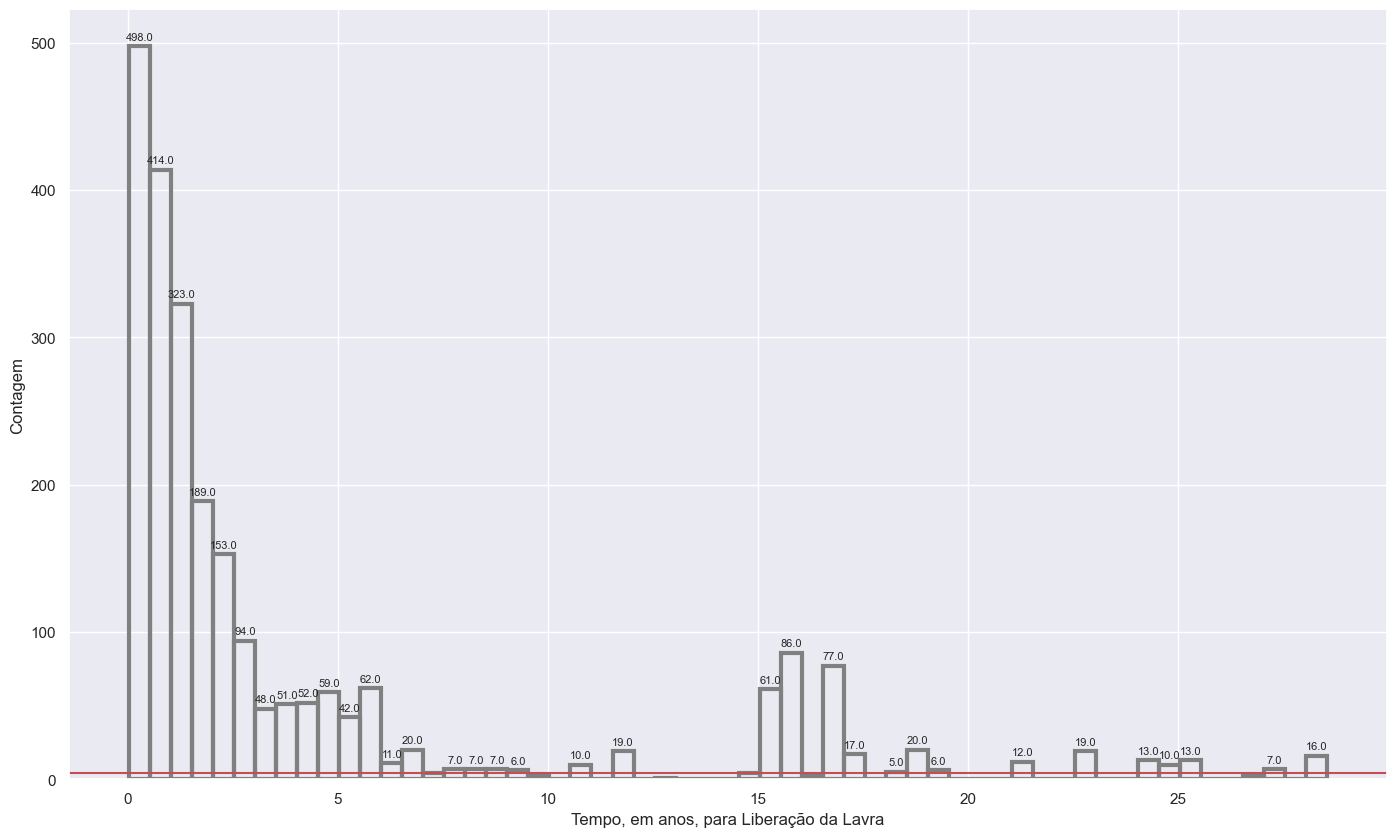

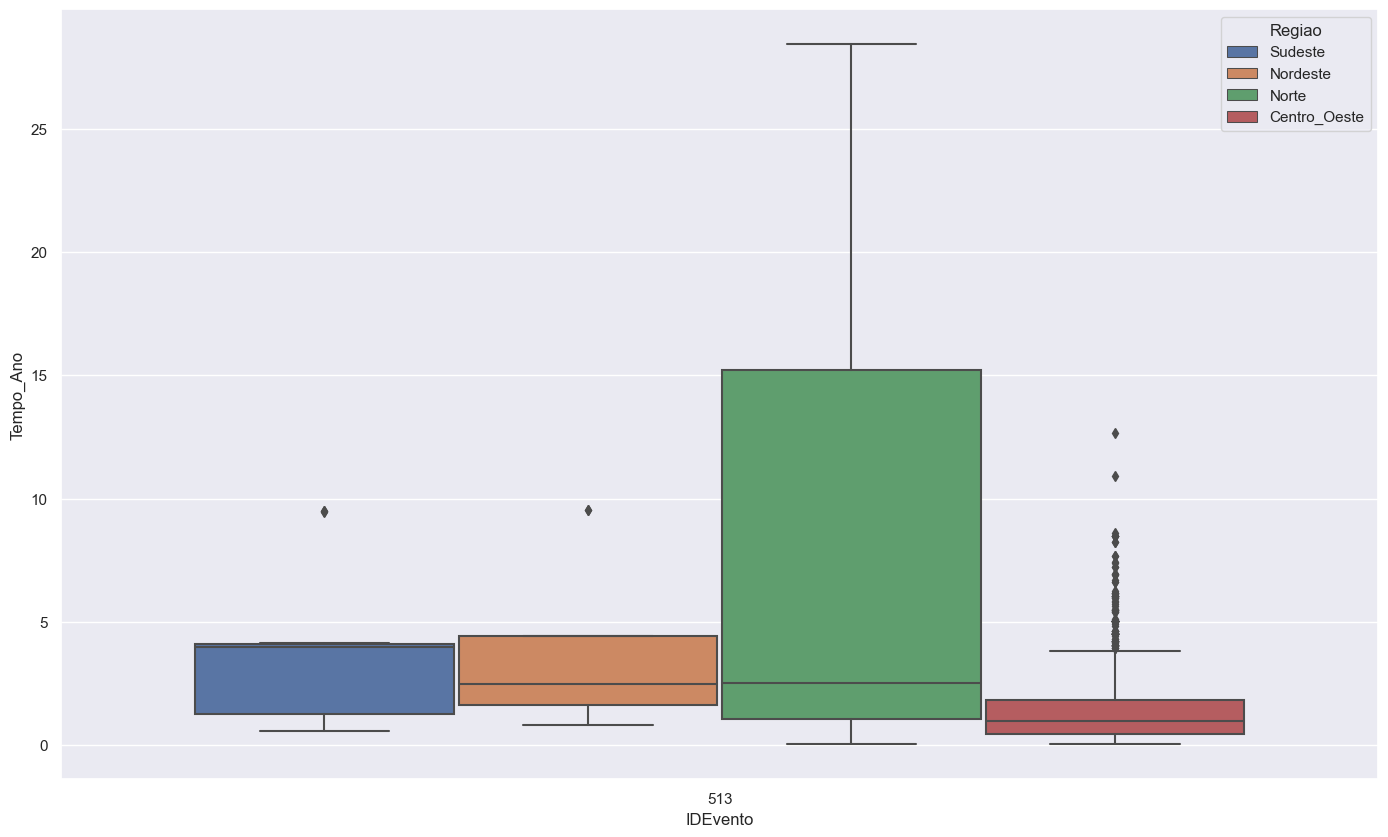

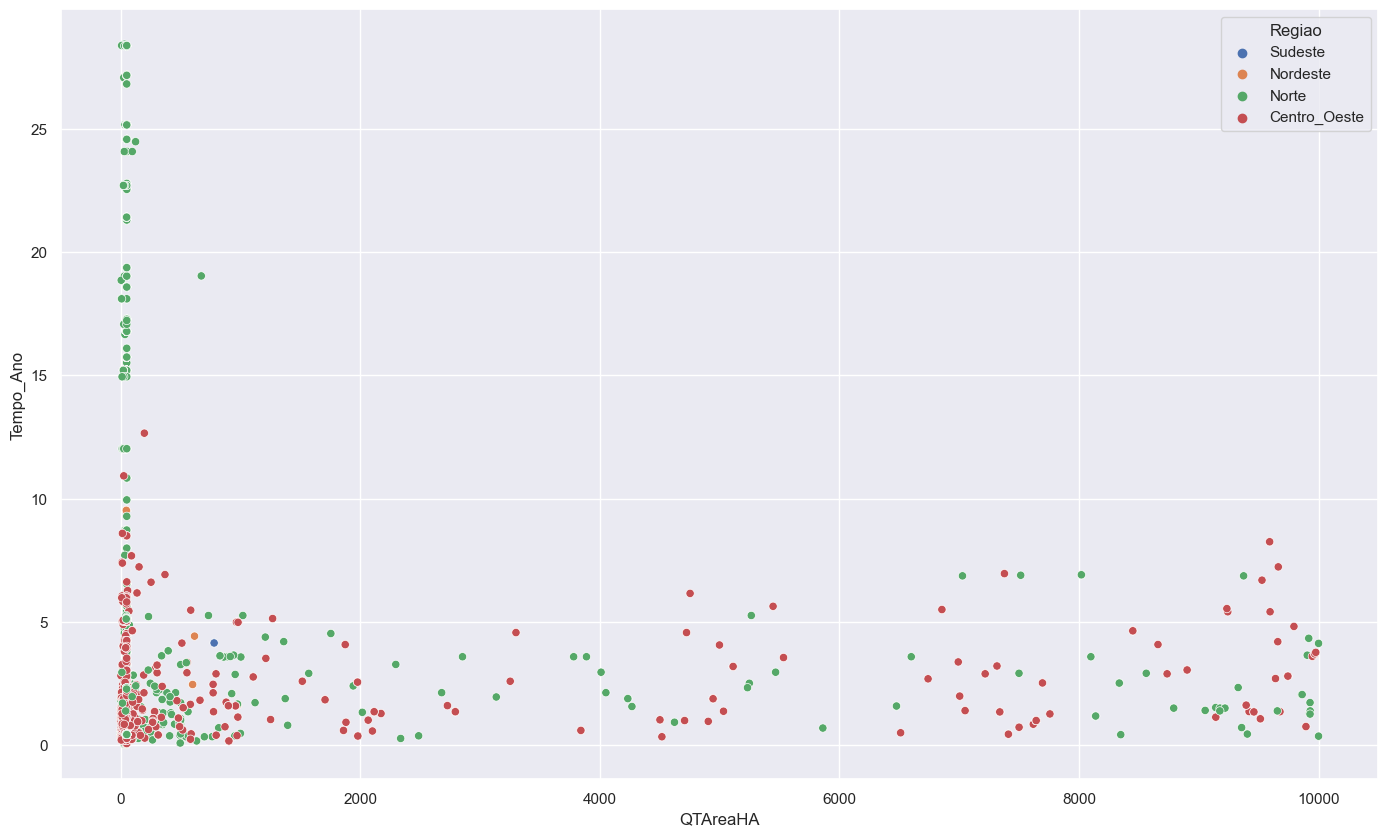

In [7]:
#Fazendo plots
import seaborn as sns
import  matplotlib.pyplot as plt
%matplotlib inline
sns.set(rc={"figure.figsize":(17, 10)})
y=sns.histplot(df_2_m_e_u_a.query("IDEvento==513" )['Tempo_Ano'], #Histplot simples
                stat='count', alpha=.4,binwidth=0.5,linewidth=3, edgecolor=".5", facecolor=(0, 0, 0, 0))
for c in y.containers:
    
    # customize the label to account for cases when there might not be a bar section
    labels = [f'{h:0.1f}' if (h := v.get_height()) > df_2_m_e_u_a.query("IDEvento==513" )['Tempo_Ano'].mean() else '' for v in c ]
    
    # set the bar label
    y.bar_label(c, labels=labels, fontsize=8, padding=3)
y.axhline(df_2_m_e_u_a.query("IDEvento==513" )['Tempo_Ano'].mean(),color ='r')
y.set(xlabel='Tempo, em anos, para Liberação da Lavra', ylabel='Contagem')
plt.show()

sns.boxplot(df_2_m_e_u_a.query("IDEvento==513" ),x='IDEvento',y='Tempo_Ano',hue = 'Regiao')
plt.show()


sns.scatterplot(data=df_2_m_e_u_a, x="QTAreaHA", y="Tempo_Ano", hue="Regiao")
plt.show()

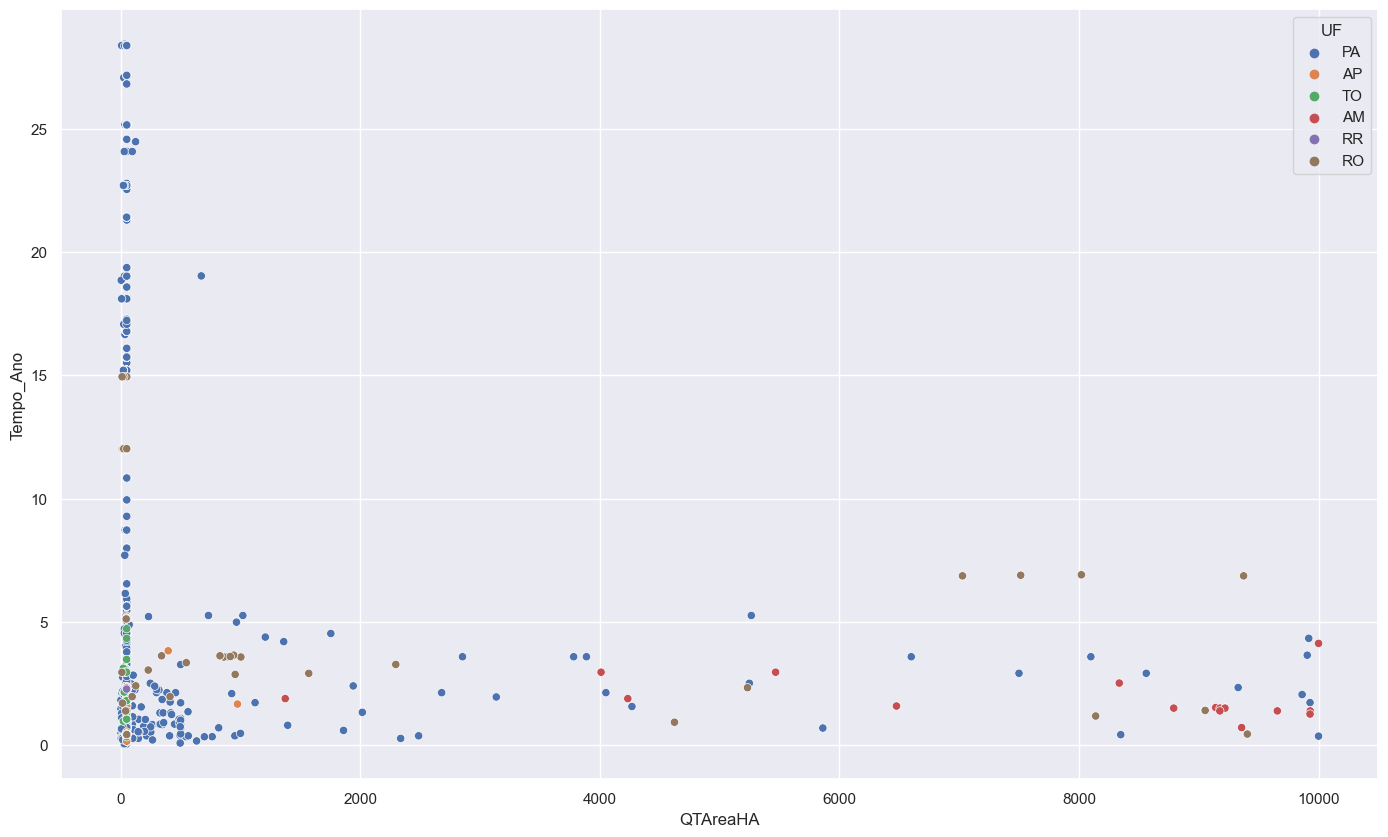

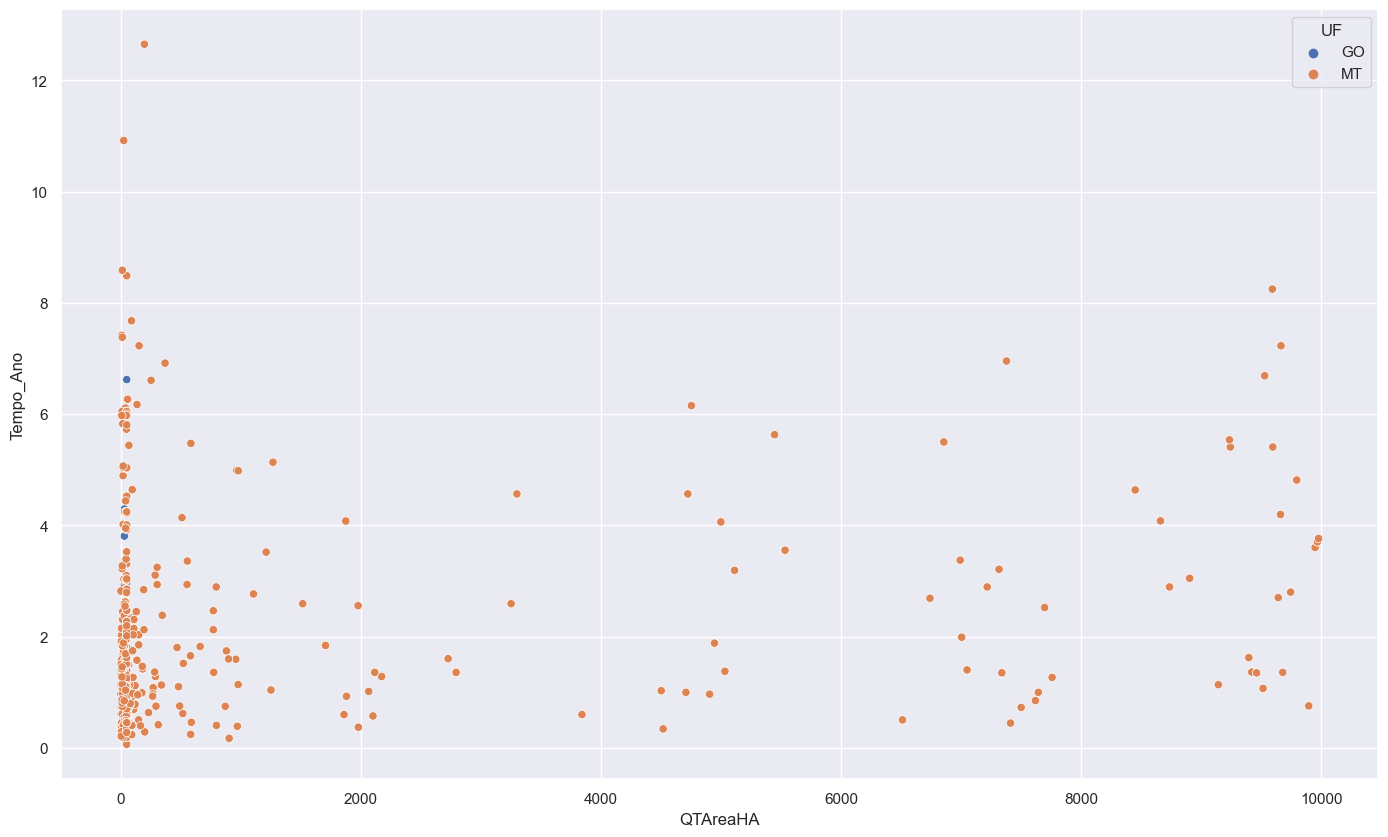

In [30]:
#Plotando para Regiao Norte e Centro Oeste
import seaborn as sns
import  matplotlib.pyplot as plt
%matplotlib inline
sns.set(rc={"figure.figsize":(17, 10)})

sns.scatterplot(data=df_2_m_e_u_a.query("Regiao=='Norte'"), x="QTAreaHA", y="Tempo_Ano", hue="UF")
plt.show()

sns.scatterplot(data=df_2_m_e_u_a.query("Regiao=='Centro_Oeste'"), x="QTAreaHA", y="Tempo_Ano", hue="UF")
plt.show()

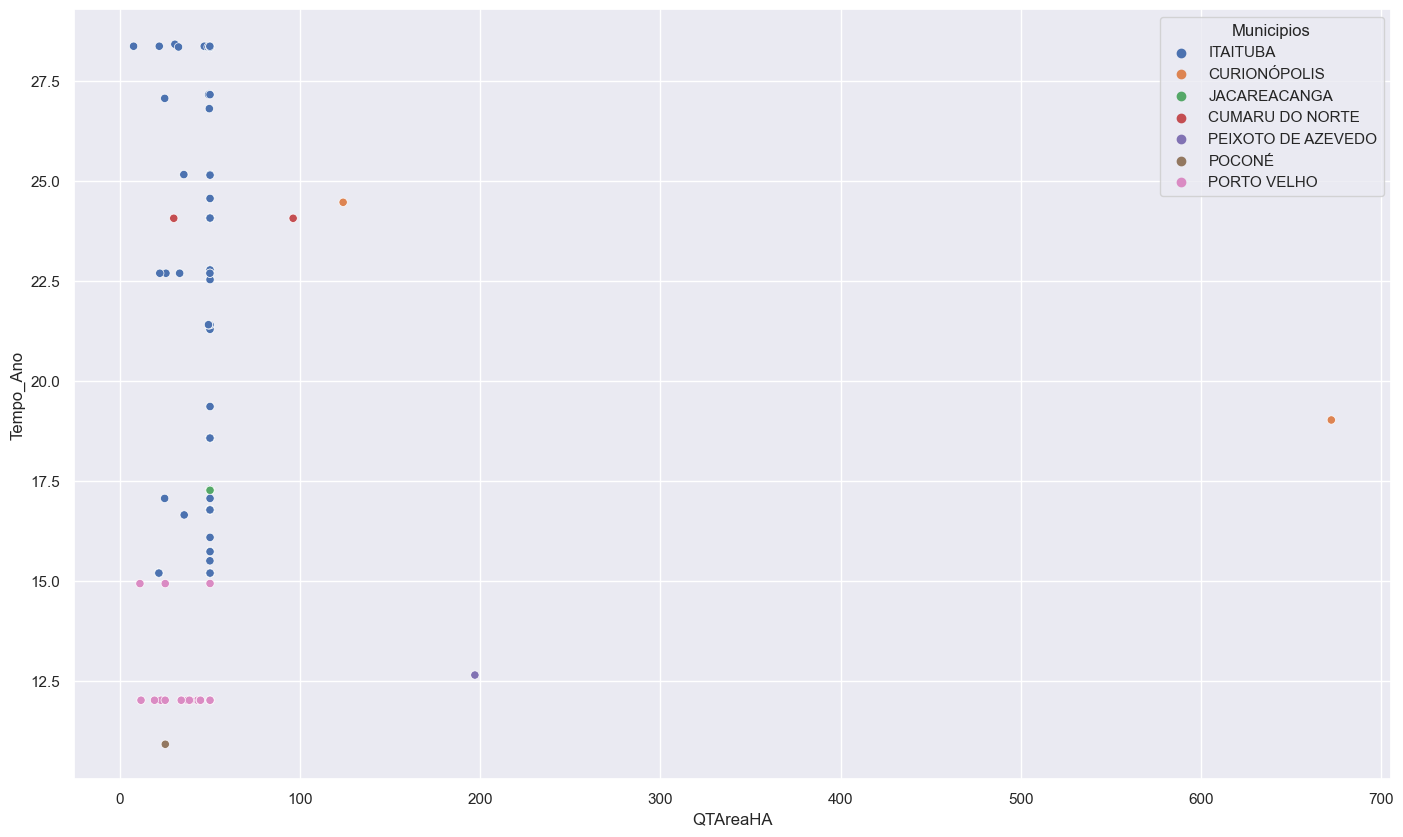

In [83]:
#Analisando quanto tempo demorou para processos antes dos anos 2000 serem aprovados (e para quais estados)
sns.scatterplot(data=df_2_m_e_u_a.query("Ano_333 < 2000 & Tempo_Ano >10"), x="QTAreaHA", y="Tempo_Ano", hue="Municipios")
plt.show()

In [14]:
df_2_m_e_u_a.query('Tempo_Ano > 25')

,Unnamed: 0.1,Unnamed: 0,DSProcesso,IDEvento,DTEvento_x,Evento_,Tempo_dias,Tempo_Ano,Tempo_Mes,DTEvento_y,Ano_333,Municipios,UF,QTAreaHA,Regiao
319,6415612,6415612,850.566/1991,513,2018-07-05,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL,9886 days,27.066949,324.803384,1991-06-11,1991,ITAITUBA,PA,24.85,Norte
822,6636006,6636006,851.906/1993,513,2018-07-11,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL,9190 days,25.161365,301.936385,1993-05-13,1993,ITAITUBA,PA,50.00,Norte
823,6636090,6636090,851.907/1993,513,2018-07-11,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL,9190 days,25.161365,301.936385,1993-05-13,1993,ITAITUBA,PA,35.44,Norte
824,6636173,6636173,851.908/1993,513,2018-07-11,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL,9190 days,25.161365,301.936385,1993-05-13,1993,ITAITUBA,PA,35.46,Norte
825,6636267,6636267,851.909/1993,513,2018-07-11,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL,9190 days,25.161365,301.936385,1993-05-13,1993,ITAITUBA,PA,50.00,Norte
826,6636351,6636351,851.910/1993,513,2018-07-11,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL,9190 days,25.161365,301.936385,1993-05-13,1993,ITAITUBA,PA,50.00,Norte
827,6636435,6636435,851.911/1993,513,2018-07-11,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL,9190 days,25.161365,301.936385,1993-05-13,1993,ITAITUBA,PA,50.00,Norte
828,6636519,6636519,851.912/1993,513,2018-07-11,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL,9190 days,25.161365,301.936385,1993-05-13,1993,ITAITUBA,PA,50.00,Norte
829,6636627,6636627,851.913/1993,513,2018-07-11,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL,9190 days,25.161365,301.936385,1993-05-13,1993,ITAITUBA,PA,50.00,Norte
830,6636716,6636716,851.914/1993,513,2018-07-11,PLG/PERMISSÃO LAVRA GARIMPEIRA PUBL,9190 days,25.161365,301.936385,1993-05-13,1993,ITAITUBA,PA,50.00,Norte


In [13]:
df_2_m_e_u_a.query("IDEvento==513" )['Tempo_Ano'].max()

28.41947473254071